<a href="https://colab.research.google.com/github/auma2022/Diana_CV/blob/main/noshow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#No-show appointments
##Description
This is an analysis of medical appointments dataset. The dataset has a record of over 110,000 patients in Brazil.Our goal is to analyse this dataset and find out the main causes of patients failing to attend the appointments. This will help the hospital save on cost and utilise the time that health workers waste while waiting for patients that end up not turning up. It will also help them schedule the appointment for the patients that are likely to attend hence serving many people in this case.


##Dataset columns descriptions:

PatientId - Patient identification

AppointmentID - Appointment identification

Gender - Patient gender (Male or Female)

ScheduledDay - The day patient set up their appointment

AppointmentDay - The day of actual appointment of the patient
Age - patient Age

Neighbourhood - Hospital location

Scholarship - Indicates whether or not the patient is on scholarship(0 for no and 1 for Yes)

Hipertension - Indicates whether or not the patient has hypertension or not(0 for no and 1 for Yes)

Diabetes - Indicates whether or not the patient has diabetes or not (0 for no and 1 for Yes)

Alcoholism - Indicates whether or not the patient has alcoholism or not (0 for no and 1 for Yes)

Handicap - Indicates whether or not the patient has handicap or not (on scale from 0 to 4 )

SMS_received = Indicates whether or not the patient received SMS (0 for no and 1 for Yes)

No-show = Indicates whether or not the patient attend the appointment(Yes for didn't show and No for show)


#Questions:

1 - Does Gender affect the attendance?

percentage of Males who attended

percentage of Females who attended

2 - How the Alcoholism affect probability of show up?

percentage of patients who have alcoholism and attended the appointment.

percentage of patients who don't have alcoholism and attended the appointment

3 - How the Hypertension affect probability of show up?

percentage of patients who have hypertension and attended the appointment

percentage of patients who don't have hypertension and attended the appointment

4 - How the Handicap affect probability of show up?

percentage of patients who have handicap and attended the appointment

percentage of patients who don't have handicap and attended the appointment

5 - How the Diabetes affect probability of show up?

percentage of patients who have diabetes and attended the appointment

percentage of patients who don't have diabetes and attended the appointment

6 - How the Scholarship affect probability of show up?

percentage of patients who have Scholarship and attended the appointment

percentage of patients who don't have Scholarship and attended the appointment

7 -How does receiving SMS affect the attendance?

percentage of patients who received SMS and attended the appointment

percentage of patients who didn't receive SMS and attended the appointment

8 - How does Age affect the attendance?

9 - How does appointment delay affect the attendance?


In [20]:
#import required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [21]:
#import dataset and check first six rows
path = '/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(path)
df.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [22]:
#checking number of rows and columns
df.shape

(110527, 14)

In [23]:
#check relavant information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data has no missing values

In [24]:
#descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The min value of age column is -1 which is imposible

In [25]:
#checking for duplicate values
df.duplicated().sum()

0

There are no duplicate values

#Data Cleaning
drop the patientID and AppointmentID columns since we are not going to use them

drop the row with age value of -1

Change ScheduledDay and AppointmentDay types to Datetime


Change No-Show column type to int


In [26]:
#drop the patientID and AppointmentID
df.drop(["PatientId","AppointmentID"], axis= 1 , inplace= True)

In [27]:
#drop the row with age value of -1
df.drop(df.query("Age<0").index, inplace = True)
#confirm if negative age has been dropped
df.query("Age<0")

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [28]:
#Change ScheduledDay and AppointmentDay types to Datetime
change_column_date = ["ScheduledDay", "AppointmentDay"]
for col in change_column_date:
    df[col] = pd.to_datetime(df[col])
    df.rename(columns = {col : col[:-3]+"_day"}, inplace=True)

In [29]:
#checking datatype
df.dtypes

Gender                          object
Scheduled_day      datetime64[ns, UTC]
Appointment_day    datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handcap                          int64
SMS_received                     int64
No-show                         object
dtype: object

In [30]:
#correlation between the columns
df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192
Hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149
Handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f388af618d0>,
      dtype=object)

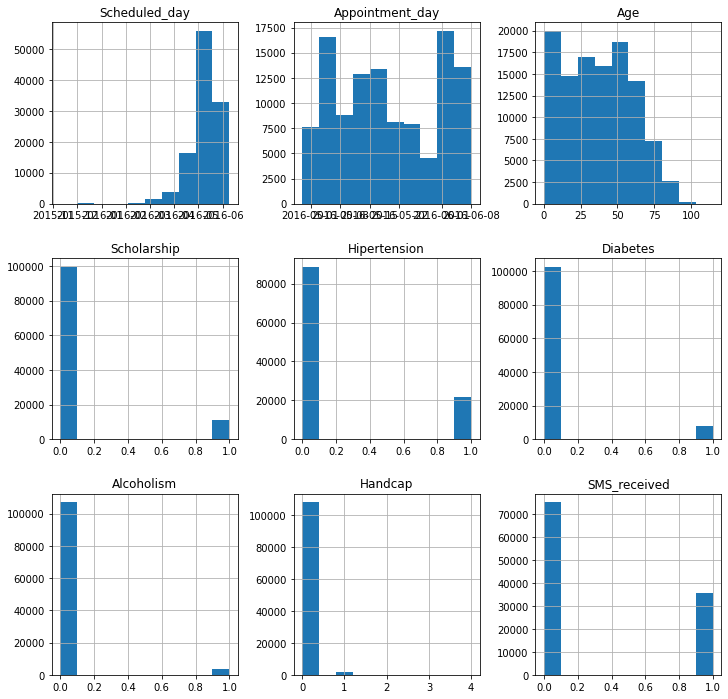

In [31]:
#check distribution of data
df.hist(figsize=(12,12), alpha=1)

In [33]:
#patients who attended
attended = df["No-show"].value_counts()
attended

No     88207
Yes    22319
Name: No-show, dtype: int64

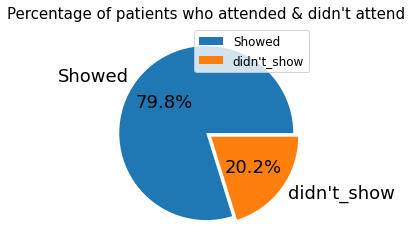

In [53]:
#pie chart to show attendance
plt.pie(attended,labels=["Showed", "didn't_show"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.07))
plt.rcParams['font.size'] = 12
plt.title("Percentage of patients who attended & didn't attend",fontsize=15)
plt.legend()
plt.show()

In [44]:
df['No-show'] = df['No-show'].map(
                   {'Yes':1 ,'No':0})